In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import vmo.analysis as van
import vmo.generate as vge
import matplotlib.pyplot as plt
import sklearn.preprocessing as pre
import librosa, vmo
import IPython.display
%matplotlib inline

## Load audio file 

In [3]:
target_file = '../files/tenor_sax.wav'
playback_y, sr = librosa.load(target_file)

In [4]:
IPython.display.Audio(data=playback_y, rate=sr)

## Parameters

In [7]:
sample_rate = 22050
fft_size = 2048*4
hop_size = fft_size//2

## Analysis

In [8]:
y, sr = librosa.load(target_file, sr=sample_rate)
C = librosa.feature.chroma_stft(y=y, sr=sr, n_fft=fft_size, hop_length=hop_size, octwidth = None)
feature = np.log(C+np.finfo(float).eps)
feature = pre.normalize(feature)

In [9]:
chroma_frames = feature.transpose()
r = (0.0, 1.01, 0.01) 
ideal_t = vmo.find_threshold(chroma_frames, r = r,flag = 'a', dim=12)
oracle_t = vmo.build_oracle(chroma_frames, flag = 'a', threshold = ideal_t[0][1], feature = 'chroma', dim=12)

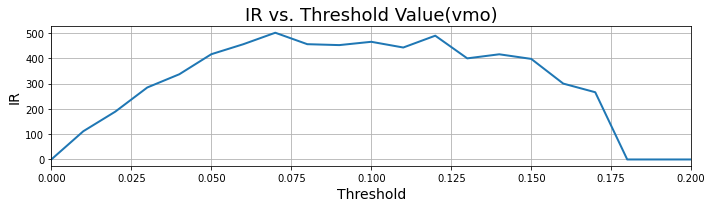

In [10]:
x = np.array([i[1] for i in ideal_t[1]])
y = [i[0] for i in ideal_t[1]]
fig = plt.figure(figsize = (10,3))
plt.plot(x, y, linewidth = 2)
plt.title('IR vs. Threshold Value(vmo)', fontsize = 18)
plt.grid(b = 'on')
plt.xlabel('Threshold', fontsize = 14)
plt.ylabel('IR', fontsize = 14)
plt.xlim(0,0.2)
plt.tight_layout()

## Synthesis

In [11]:
seq = vge.improvise(oracle_t, seq_len = oracle_t.n_states-1, LRS = 2, weight = 'lrs')
x, _w, new_sr = vge.audio_synthesis(target_file, 'vmo_synthesis_test.wav', seq, 
                                    analysis_sr=sample_rate, buffer_size = fft_size, hop = hop_size)

In [12]:
IPython.display.Audio(data=x, rate=new_sr)